# <span style="color:blue"> __Notebook com as análises e os gráficos solicitados__ </span>

Este notebook tem como objetivo responder as perguntas de negócios e criar  um  relatório  visual  que  apresente  as 
descobertas de forma clara e intuitiva para as equipes de gestão, marketing e operações. 

Imports das bibliotecas necessárias e leitura do arquivo csv da camada gold pra execução das análises.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick

# Carregar os dados
dados = pd.read_csv("output/dados_gold.csv")
# Adicionar 1 ao índice para começar em 1
dados.index += 1
# Mostrar as primeiras linhas do DataFrame
dados.head()

,cliente,produto,preco,categoria,quantidade,data,cidade,Faturamento
1,2954,notebook,4000.0,Informática e Periféricos,5,31/12/2025,Porto Alegre,20000.0
2,8361,carregador,100.0,Smartphones e Acessórios,1,31/12/2025,Joinville,100.0
3,9296,smartphone,2000.0,Smartphones e Acessórios,4,31/12/2025,Curitiba,8000.0
4,2142,fogao,1500.0,Eletrodomésticos,1,31/12/2025,Curitiba,1500.0
5,6377,notebook,4000.0,Informática e Periféricos,2,31/12/2025,São Paulo,8000.0


### __🔎 O que vender?__
Identificar os produtos de maior sucesso para otimizar nosso portfólio 
e estoque. 

In [42]:
# Análise dos produtos mais vendidos
mais_vendidos = dados.copy()

# Agrupa por produto, soma a quantidade vendida, ordena do maior para o menor e reseta o índice para melhor visualização
mais_vendidos = (
    mais_vendidos
    .groupby('produto')['quantidade']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

mais_vendidos.index += 1
mais_vendidos.head(10)

,produto,quantidade
1,smart tv,1870
2,fone de ouvido,1856
3,chromecast,1849
4,notebook,1841
5,ar-condicionado,1838
6,geladeira,1794
7,mouse,1792
8,soundbar,1788
9,smartphone,1759
10,monitor,1724


### 📊 __Gráfico__
Obs: Esse gráfico foi gerado com auxilio de Inteligência Artifical

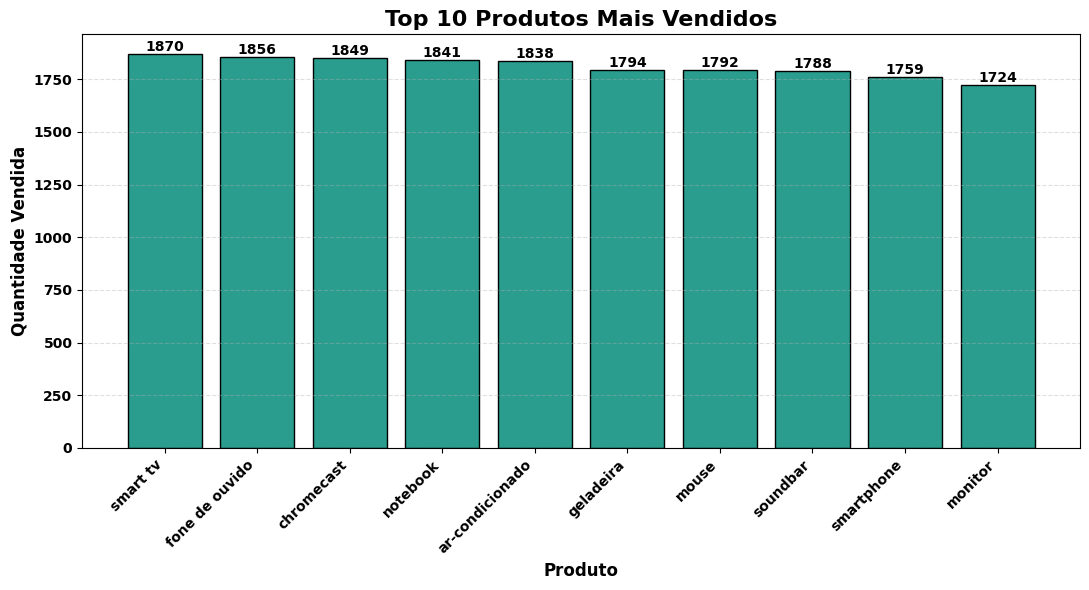

In [43]:
# Seleciona Top 10
top10 = mais_vendidos.head(10)

plt.figure(figsize=(11, 6))

barras = plt.bar(
    top10['produto'],
    top10['quantidade'],
    color='#2a9d8f',
    edgecolor='black'
)

# Valores em cima das barras
for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        altura,
        f'{int(altura)}',
        ha='center',
        va='bottom',
        fontweight='bold'
    )

# Títulos e rótulos
plt.title('Top 10 Produtos Mais Vendidos', fontsize=16, fontweight='bold')
plt.xlabel('Produto', fontsize=12, fontweight='bold')
plt.ylabel('Quantidade Vendida', fontsize=12, fontweight='bold')

# Estilo dos eixos
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.yticks(fontweight='bold')

# Grid suave
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

### __🔎 Onde focar?__ 
Compreender quais categorias de produtos geram a maior parte da nossa 
receita. 

In [44]:
# Análise de maior receita por categoria
maior_receita = dados.copy()

# Agrupa por categoria, soma o faturamento, ordena do maior para o menor e reseta o índice para melhor visualização
maior_receita = (
    maior_receita
    .groupby('categoria')['Faturamento']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

maior_receita.index += 1
maior_receita.head(10)

,categoria,Faturamento
1,Eletrodomésticos,16070000.0
2,Informática e Periféricos,10129200.0
3,"TV, Áudio e Vídeo",9637800.0
4,Smartphones e Acessórios,5730800.0


### __📊 Gráfico__
Obs: Esse gráfico foi gerado com auxilio de Inteligência Artifical

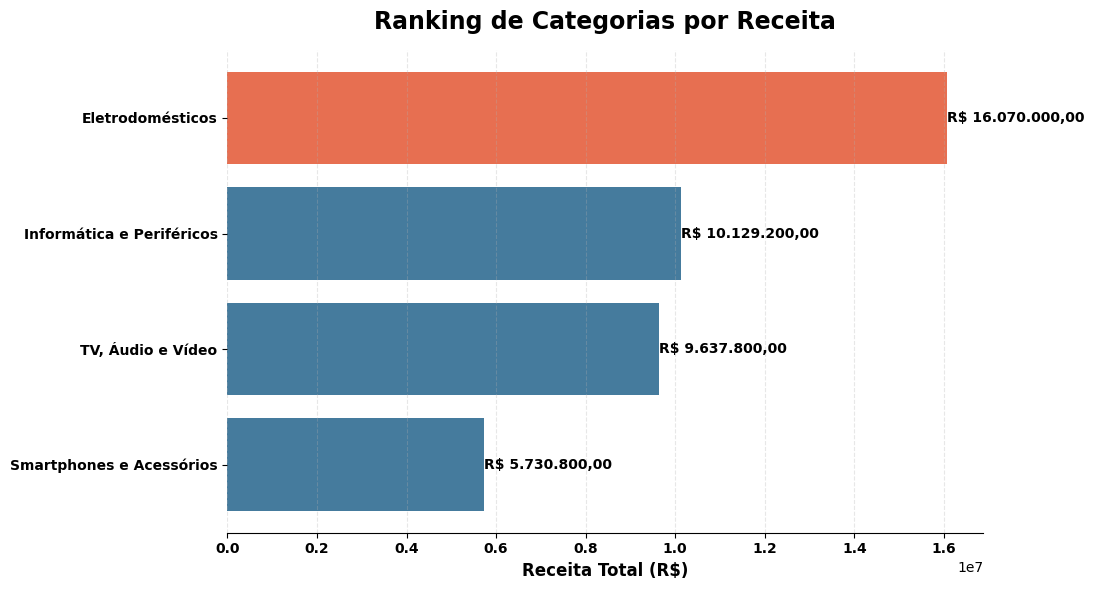

In [45]:
top = maior_receita.head(10)

plt.figure(figsize=(11, 6))

# Paleta elegante (primeira em destaque)
cores = ['#e76f51'] + ['#457b9d'] * (len(top) - 1)

barras = plt.barh(
    top['categoria'],
    top['Faturamento'],
    color=cores
)

# Maior no topo
plt.gca().invert_yaxis()

# Remover bordas (estilo moderno)
for spine in ['top', 'right', 'left']:
    plt.gca().spines[spine].set_visible(False)

# Formatação dos valores em R$ ao final das barras
for barra in barras:
    valor = barra.get_width()
    texto = f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
    
    plt.text(
        valor,
        barra.get_y() + barra.get_height() / 2,
        texto,
        va='center',
        ha='left',
        fontweight='bold',
        fontsize=10
    )

# Títulos
plt.title('Ranking de Categorias por Receita', fontsize=17, fontweight='bold', pad=15)
plt.xlabel('Receita Total (R$)', fontsize=12, fontweight='bold')
plt.ylabel('')

# Estilo dos ticks
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Grid suave só no eixo X
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

 
### __🔎 Quando agir?__ 
Analisar a performance de vendas ao longo do tempo para identificar 
tendências, picos e sazonalidades. 
 

In [ ]:
receita_mensal = dados.copy()

# Conferindo se a coluna data está em formato datetime
receita_mensal['data'] = pd.to_datetime(receita_mensal['data'], dayfirst=True)

# Agrupa por mês, soma o faturamento e reseta o índice
receita_mensal = (
    receita_mensal
    .groupby(receita_mensal['data']
    .dt.to_period('M'))['Faturamento']
    .sum()
    .reset_index()
)

receita_mensal = receita_mensal.rename(columns={'data': 'mes'})

receita_mensal

,mes,Faturamento
0,2024-01,237100.0
1,2024-02,1680100.0
2,2024-03,1930800.0
3,2024-04,1868500.0
4,2024-05,1844100.0
5,2024-06,1740200.0
6,2024-07,1622600.0
7,2024-08,1628600.0
8,2024-09,1660200.0
9,2024-10,1623700.0


### __📈 Gráfico__
Obs: Esse gráfico foi gerado com auxilio de Inteligência Artifical

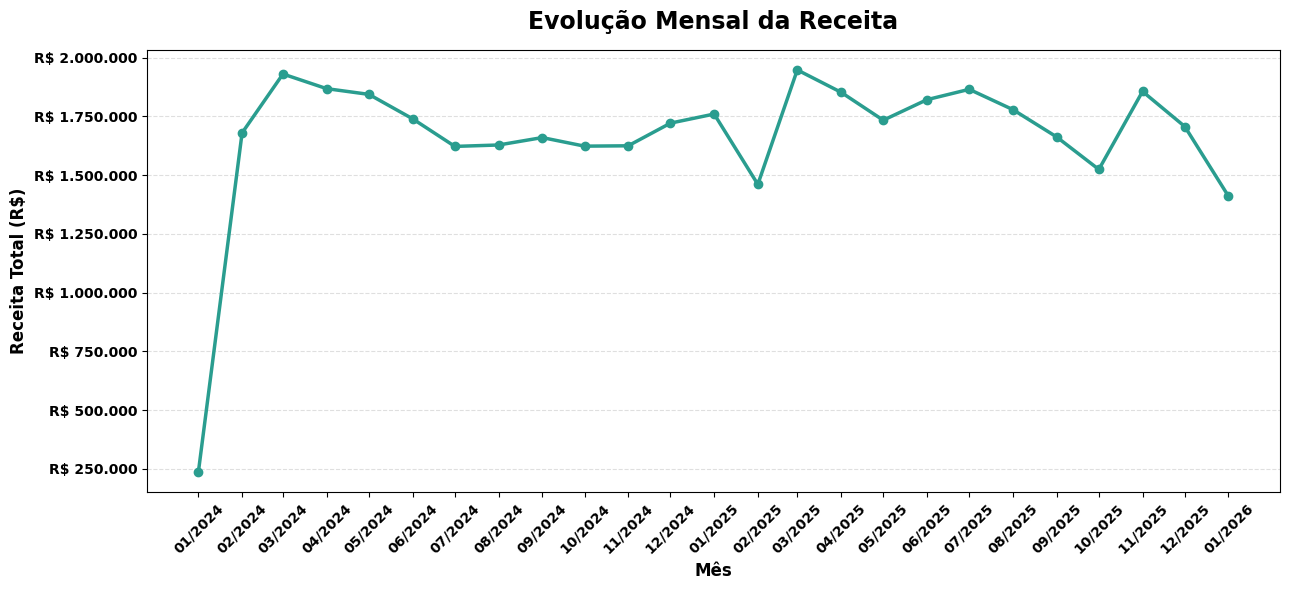

In [47]:
df = receita_mensal.copy() 

# Garantir formato datetime correto
df['data'] = pd.to_datetime(df['mes'].dt.to_timestamp())

# Criar intervalo completo de meses
todos_meses = pd.date_range(
    start=df['data'].min(),
    end=df['data'].max(),
    freq='MS'  # Month Start
)

# Reindexar para incluir meses faltantes
df_completo = (
    df
    .set_index('data')
    .reindex(todos_meses, fill_value=0)
    .rename_axis('data')
    .reset_index()
)

plt.figure(figsize=(13, 6))

plt.plot(
    df_completo['data'],
    df_completo['Faturamento'],
    marker='o',
    linewidth=2.5,
    color='#2a9d8f'
)

# Formatar eixo Y em Real
def formatar_real(x, pos):
    return f'R$ {x:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_real))

# Mostrar TODOS os meses no eixo X
plt.xticks(
    df_completo['data'],
    df_completo['data'].dt.strftime('%m/%Y'),
    rotation=45,
    fontweight='bold'
)

# Títulos
plt.title('Evolução Mensal da Receita', fontsize=17, fontweight='bold', pad=15)
plt.xlabel('Mês', fontsize=12, fontweight='bold')
plt.ylabel('Receita Total (R$)', fontsize=12, fontweight='bold')

# Estilo dos eixos
plt.yticks(fontweight='bold')

# Grid elegante
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

### __🔎 Para onde expandir?__
Mapear a distribuição geográfica de nossas vendas para descobrir nossos mercados mais fortes. 

In [48]:
vendas_por_estado = dados.copy()

# Agrupa por cidade e soma o faturamento
vendas_por_estado = (
    vendas_por_estado.groupby('cidade')['Faturamento']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
vendas_por_estado.index += 1
vendas_por_estado.head(10)

,cidade,Faturamento
1,Balneário Camboriú,4499200.0
2,Florianópolis,4479500.0
3,Santos,4369400.0
4,Joinville,4227100.0
5,Campinas,4136000.0
6,São Paulo,4130300.0
7,Curitiba,4115600.0
8,Belo Horizonte,4011100.0
9,Porto Alegre,3834000.0
10,Rio de Janeiro,3765600.0


### __📊 Gráfico__
Obs: Esse gráfico foi gerado com auxilio de Inteligência Artifical

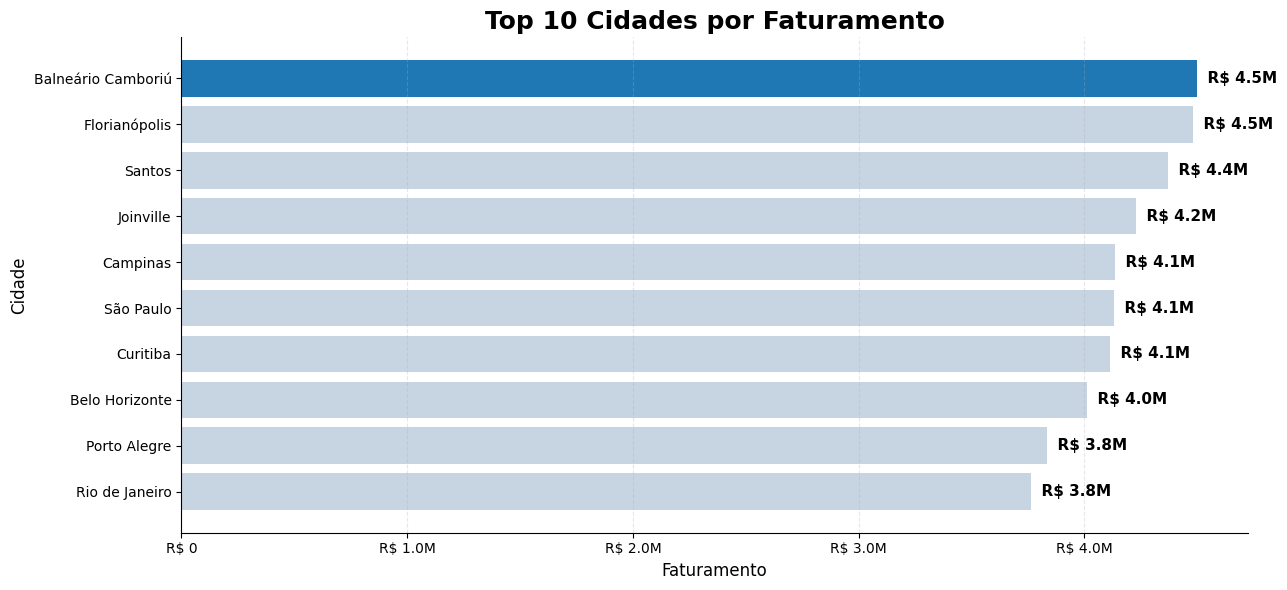

In [ ]:
top10faturamento = vendas_por_estado.head(10)

plt.figure(figsize=(13,6))

# Cores: destaque para a primeira (maior faturamento)
cores = ['#1f77b4'] + ['#c7d4e2'] * (len(top10faturamento) - 1)

bars = plt.barh(top10faturamento['cidade'], top10faturamento['Faturamento'], color=cores)

plt.gca().invert_yaxis()

plt.title("Top 10 Cidades por Faturamento", fontsize=18, fontweight='bold')
plt.xlabel("Faturamento", fontsize=12)
plt.ylabel("Cidade", fontsize=12)

# Função abreviada
def formatar_reais_abreviado(valor):
    if valor >= 1_000_000:
        return f"R$ {valor/1_000_000:.1f}M"
    elif valor >= 1_000:
        return f"R$ {valor/1_000:.0f}k"
    else:
        return f"R$ {valor:.0f}"

# Formatar eixo X
ax = plt.gca()
ax.xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: formatar_reais_abreviado(x))
)

# Remover bordas desnecessárias (estilo clean)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adicionar rótulos no final das barras
for bar in bars:
    largura = bar.get_width()
    plt.text(largura, bar.get_y() + bar.get_height()/2,
             f"  {formatar_reais_abreviado(largura)}",
             va='center', fontsize=11, fontweight='bold')

# Grade suave
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()